In [1]:
! pip install chart_studio

In [2]:
#pip install wordcloud
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import chart_studio.plotly as py
import plotly.figure_factory as ff
from matplotlib import rc
df = pd.read_csv('data/opportunities.csv',low_memory=False)
#df.info()

In [3]:
#Convierto columna Last_Modified_Date a date
df["Last_Modified_Date"] = pd.to_datetime(df["Last_Modified_Date"], errors='coerce')

In [4]:
#Convierto columna Opportunity_Created_Date a date
df["Opportunity_Created_Date"] = pd.to_datetime(df["Opportunity_Created_Date"], errors='coerce')

In [5]:
#Agrego columna Diferencia en dias entre la fecha de creacion de la oportunidad y la ultima modificacion de la oportunidad
df["diferencia_en_dias"] = (df["Last_Modified_Date"] - df["Opportunity_Created_Date"]).dt.days

In [6]:
#Agrupo por oportunidad
df_agrupado_x_oportunidad = df.groupby(["Opportunity_ID"]).agg({"Stage":'first', "diferencia_en_dias":"first", "ID":"first"}).reset_index()
#df_agrupado_x_oportunidad[df_agrupado_x_oportunidad["Opportunity_ID"] == 2008]

In [7]:
#Cantidad de oportunidades segun la cantidad de dias que se tomo en llegar a Closed Won/Lost
df_cant_oportunidades_por_cant_dias = df_agrupado_x_oportunidad[(df_agrupado_x_oportunidad["Stage"] == "Closed Won") | (df_agrupado_x_oportunidad["Stage"] == "Closed Lost")].groupby(["Stage", "diferencia_en_dias"]).agg({'ID':'count'}).reset_index()
df_cant_oportunidades_por_cant_dias.columns = ["Stage", "duracion_oportunidad_en_dias", "cantidad_oportunidades"]
#df_cant_oportunidades_por_cant_dias

### Cantidad de oportunidades por duracion de la oportunidad

In [8]:
#Separo DF en 2 segun Stage (Close Lost y Closed Won)
df_cant_oportunidades_por_cant_dias_Won = df_cant_oportunidades_por_cant_dias[df_cant_oportunidades_por_cant_dias["Stage"] == "Closed Won"]
df_cant_oportunidades_por_cant_dias_Lost = df_cant_oportunidades_por_cant_dias[df_cant_oportunidades_por_cant_dias["Stage"] == "Closed Lost"]
#df_cant_oportunidades_por_cant_dias_Won = df_cant_oportunidades_por_cant_dias_Won[df_cant_oportunidades_por_cant_dias_Won["duracion_oportunidad_en_dias"] > 1]
#df_cant_oportunidades_por_cant_dias_Lost = df_cant_oportunidades_por_cant_dias_Lost[df_cant_oportunidades_por_cant_dias_Lost["duracion_oportunidad_en_dias"] > 1]
df_cant_oportunidades_por_cant_dias_Won.head(5)

,Stage,duracion_oportunidad_en_dias,cantidad_oportunidades
610,Closed Won,0,359
611,Closed Won,1,238
612,Closed Won,2,82
613,Closed Won,3,73
614,Closed Won,4,43


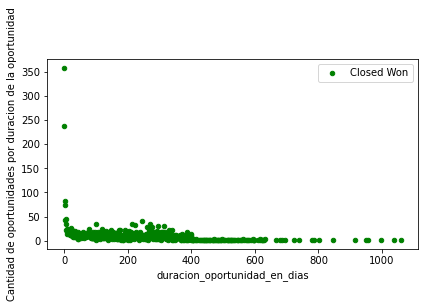

In [37]:
ax = df_cant_oportunidades_por_cant_dias_Won.plot(kind='scatter', x='duracion_oportunidad_en_dias', y='cantidad_oportunidades',color='Green', label='Closed Won')
ax.set_ylabel('Cantidad de oportunidades por duracion de la oportunidad')

#plt.tight_layout()
#plt.savefig("pngs/oportunidades-won-segun-duracion.png")

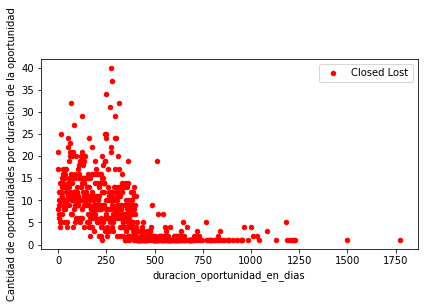

In [38]:
graf = df_cant_oportunidades_por_cant_dias_Lost.plot(kind='scatter', x='duracion_oportunidad_en_dias', y='cantidad_oportunidades', color='Red', label='Closed Lost')
graf.set_ylabel('Cantidad de oportunidades por duracion de la oportunidad')

#plt.tight_layout()
#plt.savefig("pngs/oportunidades-lost-segun-duracion.png")

### Porcentaje de oportunidades Lost/Won por duracion de la oportunidad

In [10]:
df_cant_oportunidades_lost_vs_won = df_agrupado_x_oportunidad[(df_agrupado_x_oportunidad["Stage"] == "Closed Won") | (df_agrupado_x_oportunidad["Stage"] == "Closed Lost")].groupby(["diferencia_en_dias", "Stage"]).agg({'ID':'count'}).unstack()#.reset_index()
df_cant_oportunidades_lost_vs_won.columns = ["cantidad_oportunidades_Lost", "cantidad_oportunidades_Won"]
df_cant_oportunidades_lost_vs_won.head()

,cantidad_oportunidades_Lost,cantidad_oportunidades_Won
diferencia_en_dias,,
0,21.0,359.0
1,8.0,238.0
2,17.0,82.0
3,10.0,73.0
4,6.0,43.0


In [11]:
df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won.divide(df_cant_oportunidades_lost_vs_won.sum(axis=1), axis=0)
df_cant_oportunidades_lost_vs_won_perc

,cantidad_oportunidades_Lost,cantidad_oportunidades_Won
diferencia_en_dias,,
0,0.055263,0.944737
1,0.032520,0.967480
2,0.171717,0.828283
3,0.120482,0.879518
4,0.122449,0.877551
...,...,...
1214,1.000000,NaN
1222,1.000000,NaN
1226,1.000000,NaN


In [12]:
#df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc[(df_cant_oportunidades_lost_vs_won_perc.index > 400) & (df_cant_oportunidades_lost_vs_won_perc.index < 450)]
##df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc.fillna(0)
##df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc.loc[(df_cant_oportunidades_lost_vs_won_perc["cantidad_oportunidades_Lost"] + df_cant_oportunidades_lost_vs_won_perc["cantidad_oportunidades_Won"]) > 0,:]
#df_cant_oportunidades_lost_vs_won_perc.info()
df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc.dropna()
df_cant_oportunidades_lost_vs_won_perc
#df_cant_oportunidades_lost_vs_won_perc = df_cant_oportunidades_lost_vs_won_perc[(df_cant_oportunidades_lost_vs_won_perc.index > 300) & (df_cant_oportunidades_lost_vs_won_perc.index < 550)]

,cantidad_oportunidades_Lost,cantidad_oportunidades_Won
diferencia_en_dias,,
0,0.055263,0.944737
1,0.032520,0.967480
2,0.171717,0.828283
3,0.120482,0.879518
4,0.122449,0.877551
...,...,...
617,0.500000,0.500000
623,0.666667,0.333333
684,0.500000,0.500000


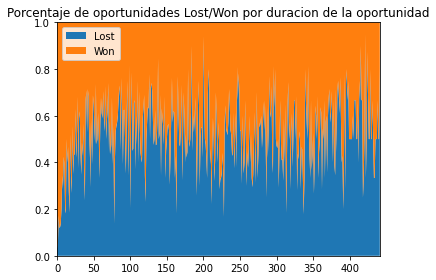

In [51]:
rows = len(df_cant_oportunidades_lost_vs_won_perc.index + 1)
#df_cant_oportunidades_lost_vs_won_perc.index
plt.stackplot(range(0,rows),  df_cant_oportunidades_lost_vs_won_perc["cantidad_oportunidades_Lost"],  df_cant_oportunidades_lost_vs_won_perc["cantidad_oportunidades_Won"], labels=['Lost','Won'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('Porcentaje de oportunidades Lost/Won por duracion de la oportunidad')

#plt.tight_layout()
#plt.savefig("pngs/porcentaje-oportunidades-lost-won-por-duracion-de-oportunidad.png")

plt.show()

### Porcentaje de Lost VS Won por intervalos de 10 dias

In [14]:
df_cant_oportunidades_por_cant_dias["periodo"] = (((df_cant_oportunidades_por_cant_dias["duracion_oportunidad_en_dias"] // 10) + 1) * 10)
#df_cant_oportunidades_por_cant_dias.head(30)
df_won_vs_lost_cada_10_dias = df_cant_oportunidades_por_cant_dias.groupby(["periodo", "Stage"]).agg({'cantidad_oportunidades': 'sum'}).unstack()
df_won_vs_lost_cada_10_dias

cantidad_oportunidades           
Stage              Closed Lost Closed Won
periodo                                  
10                       114.0      941.0
20                       103.0      179.0
30                       130.0      156.0
40                       115.0      129.0
50                       112.0       89.0
...                        ...        ...
1210                       1.0        NaN
1220                       1.0        NaN
1230                       2.0        NaN
1500                       1.0        NaN
1780                       1.0        NaN

[104 rows x 2 columns]

In [15]:
df_won_vs_lost_cada_10_dias = df_won_vs_lost_cada_10_dias.fillna(0)
#df_won_vs_lost_cada_10_dias = df_won_vs_lost_cada_10_dias.dropna()

In [16]:
df_won_vs_lost_cada_10_dias_perc = df_won_vs_lost_cada_10_dias.divide(df_won_vs_lost_cada_10_dias.sum(axis=1), axis=0)
df_won_vs_lost_cada_10_dias_perc.columns = ["Lost","Won"]
df_won_vs_lost_cada_10_dias_perc

,Lost,Won
periodo,,
10,0.108057,0.891943
20,0.365248,0.634752
30,0.454545,0.545455
40,0.471311,0.528689
50,0.557214,0.442786
...,...,...
1210,1.000000,0.000000
1220,1.000000,0.000000
1230,1.000000,0.000000


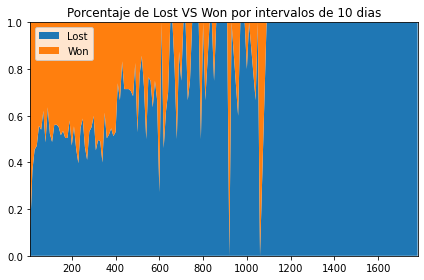

In [50]:
#rows = len(df_won_vs_lost_cada_10_dias_perc.index + 1)
#range(0,rows)
plt.stackplot(df_won_vs_lost_cada_10_dias_perc.index,  df_won_vs_lost_cada_10_dias_perc["Lost"],  df_won_vs_lost_cada_10_dias_perc["Won"], labels=['Lost','Won'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('Porcentaje de Lost VS Won por intervalos de 10 dias')

#plt.tight_layout()
#plt.savefig("pngs/porcentaje-oportunidades-lost-won-por-intervalo-10-dias.png")

plt.show()

### Cantidad de productos vendidos (Closed Won) segun la fuente de la creacion de la oportunidad

In [18]:
df_close_won = df.loc[(df['Stage'] == 'Closed Won') & (df['Source '] != 'None')]
df_close_won_x_source = df_close_won.groupby(["Source "]).agg({"Stage":'count'}).reset_index()
df_close_won_x_source.columns = ["Source", "Ventas"]
df_close_won_x_source = df_close_won_x_source.nlargest(10,"Ventas")
df_close_won_x_source

,Source,Ventas
8,Source_7,1393
2,Source_11,916
9,Source_9,839
3,Source_13,587
5,Source_3,210
0,Source_1,48
1,Source_10,36
4,Source_2,30
6,Source_4,19
7,Source_6,5


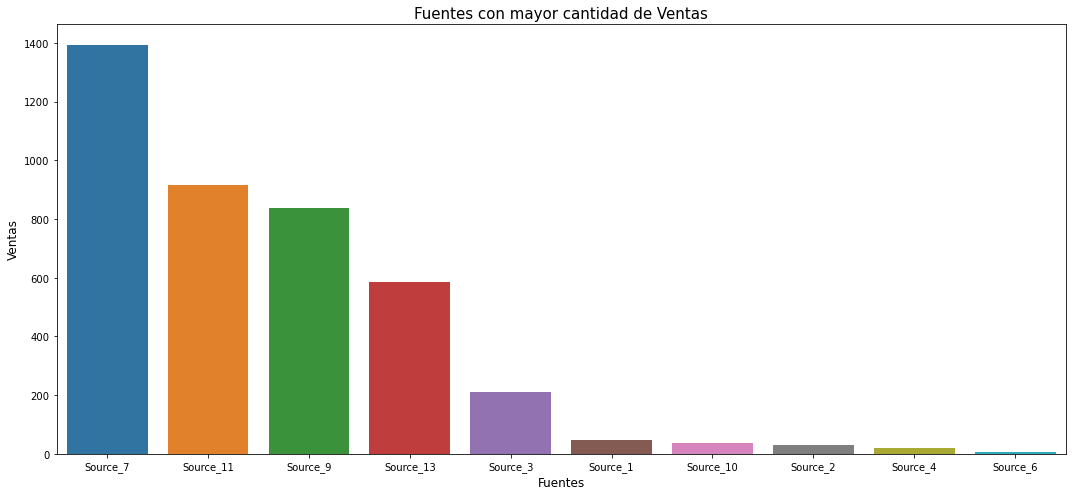

In [41]:
fig, ax = plt.subplots(figsize = (15, 7))
g = sns.barplot(x=df_close_won_x_source['Source'], y=df_close_won_x_source['Ventas'], orient='v',ax = ax,)
g.set_title("Fuentes con mayor cantidad de Ventas", fontsize=15)
g.set_xlabel("Fuentes", fontsize=12)
g.set_ylabel("Ventas", fontsize=12)

#plt.tight_layout()
#plt.savefig("pngs/fuentes-mayor-cantidad-ventas.png")

### Cantidad de ventas (Closed Won) x trimestre por cada region

In [20]:
df_x_region_x_trim = df[df['Stage'] == 'Closed Won'].groupby(["Region","Delivery_Quarter"]).agg({"ID": 'count'}).reset_index()
df_x_region_x_trim.columns = ["Region", "Trimestre", "Ventas"]
df_x_region_x_trim

,Region,Trimestre,Ventas
0,APAC,Q1,401
1,APAC,Q2,462
2,APAC,Q3,500
3,APAC,Q4,533
4,Americas,Q1,358
5,Americas,Q2,458
6,Americas,Q3,432
7,Americas,Q4,545
8,EMEA,Q1,603
9,EMEA,Q2,716


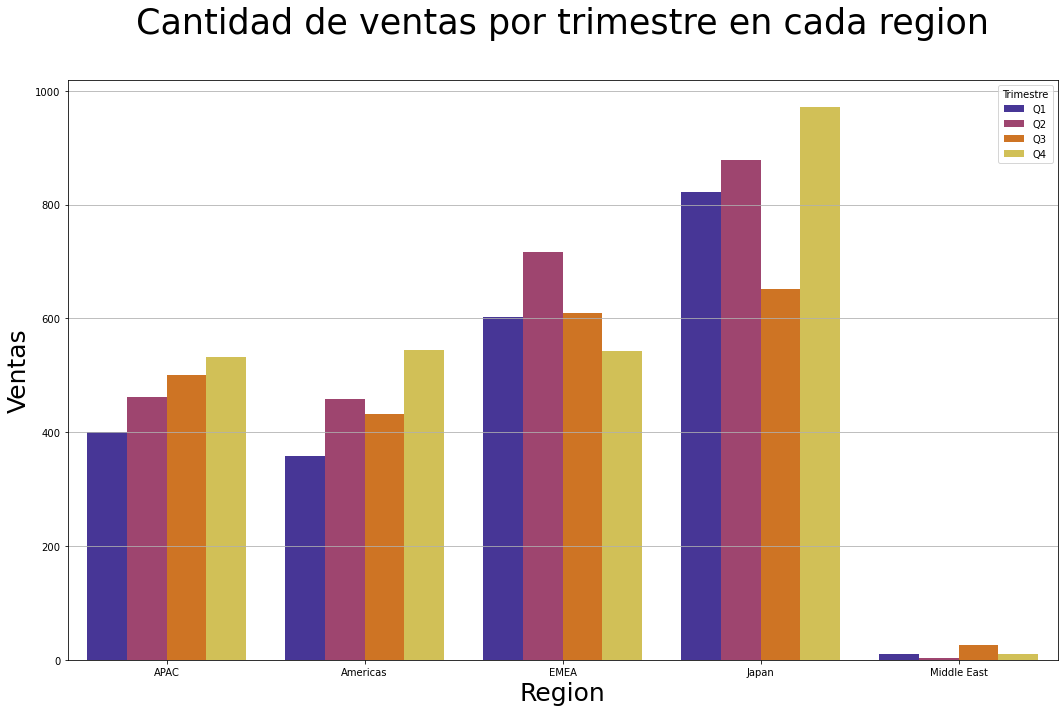

In [21]:
fig,ax=plt.subplots(figsize=(15,10))

plt.grid(True)
g = sns.barplot(ax=ax,data=df_x_region_x_trim,x='Region',y='Ventas',palette='CMRmap',alpha=1,hue='Trimestre')
g.set_title('Cantidad de ventas por trimestre en cada region\n',size=35)
g.set_xlabel('Region',size=25)
g.set_ylabel('Ventas',size=25)
g.legend(title='Trimestre')

#plt.tight_layout()
#plt.savefig("pngs/venta-region-Qn.png")

### Relacion Won/Lost con y sin permiso de precio, por cada region

In [22]:
df_x_region_x_permiso_price = df[((df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")) & (df["Pricing, Delivery_Terms_Quote_Appr"] == 1)].groupby(["Region", "Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved", "Stage", "Opportunity_ID"]).agg({"ID": 'count'}).reset_index()
df_x_region_x_permiso_price = df_x_region_x_permiso_price.groupby(["Region", "Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved", "Stage"]).agg({"ID": 'count'}).reset_index()
df_x_region_x_permiso_price["Total"] = df_x_region_x_permiso_price.groupby(["Region", "Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved"]).transform('sum')["ID"]
df_x_region_x_permiso_price["Porcentaje"] = df_x_region_x_permiso_price["ID"] / df_x_region_x_permiso_price["Total"]
df_x_region_x_permiso_price

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Stage,ID,Total,Porcentaje
0,APAC,1,0,Closed Lost,305,423,0.72104
1,APAC,1,0,Closed Won,118,423,0.27896
2,APAC,1,1,Closed Lost,362,976,0.370902
3,APAC,1,1,Closed Won,614,976,0.629098
4,Americas,1,0,Closed Lost,448,619,0.723748
5,Americas,1,0,Closed Won,171,619,0.276252
6,Americas,1,1,Closed Lost,649,1133,0.572816
7,Americas,1,1,Closed Won,484,1133,0.427184
8,EMEA,1,0,Closed Lost,365,577,0.632582
9,EMEA,1,0,Closed Won,212,577,0.367418


In [23]:
df_closed_won_sin_permiso = df_x_region_x_permiso_price.loc[(df_x_region_x_permiso_price["Stage"] == "Closed Won") & \
                                (df_x_region_x_permiso_price["Pricing, Delivery_Terms_Quote_Appr"] == 1) & \
                                (df_x_region_x_permiso_price["Pricing, Delivery_Terms_Approved"] == 0) \
                                ,"Porcentaje"]
df_closed_lost_sin_permiso = df_x_region_x_permiso_price.loc[(df_x_region_x_permiso_price["Stage"] == "Closed Lost") & \
                                (df_x_region_x_permiso_price["Pricing, Delivery_Terms_Quote_Appr"] == 1) & \
                                (df_x_region_x_permiso_price["Pricing, Delivery_Terms_Approved"] == 0) \
                                ,"Porcentaje"]
df_closed_won_con_permiso = df_x_region_x_permiso_price.loc[(df_x_region_x_permiso_price["Stage"] == "Closed Won") & \
                                (df_x_region_x_permiso_price["Pricing, Delivery_Terms_Quote_Appr"] == 1) & \
                                (df_x_region_x_permiso_price["Pricing, Delivery_Terms_Approved"] == 1) \
                                ,"Porcentaje"]
df_closed_lost_con_permiso = df_x_region_x_permiso_price.loc[(df_x_region_x_permiso_price["Stage"] == "Closed Lost") & \
                                (df_x_region_x_permiso_price["Pricing, Delivery_Terms_Quote_Appr"] == 1) & \
                                (df_x_region_x_permiso_price["Pricing, Delivery_Terms_Approved"] == 1) \
                                ,"Porcentaje"]

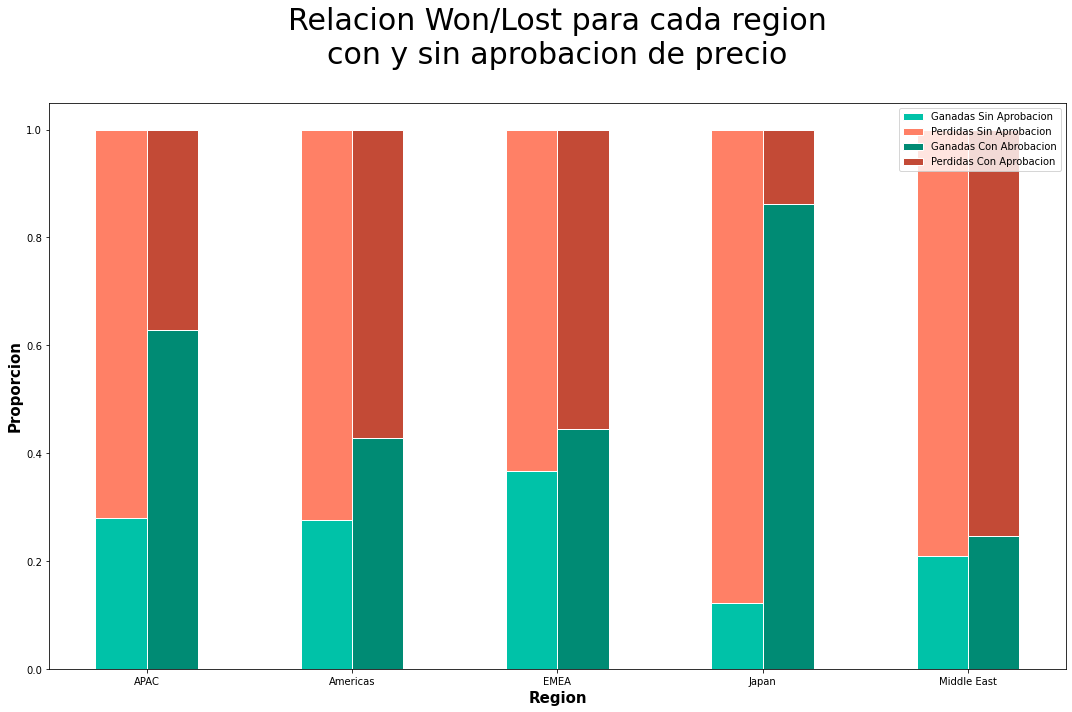

In [49]:
# Seteos grales del grafico
fig,ax=plt.subplots(figsize=(15,10))
barWidth = 0.25
 
# Seteo de lista de datos
barsWonSinPermiso = df_closed_won_sin_permiso
barsWonConPermiso = df_closed_won_con_permiso
barsLostSinPermiso = df_closed_lost_sin_permiso
barsLostConPermiso = df_closed_lost_con_permiso
 
# Seteo posiciones de barras
r1 = np.arange(len(barsWonSinPermiso))
r2 = [x + barWidth for x in r1]
 
# Genero Grafico
plt.bar(r1, barsWonSinPermiso, color='#00C2A8', width=barWidth, edgecolor='white', label='Ganadas Sin Aprobacion')
plt.bar(r1, barsLostSinPermiso, bottom=barsWonSinPermiso, color='#FF8066', width=barWidth, edgecolor='white', label='Perdidas Sin Aprobacion')
plt.bar(r2, barsWonConPermiso, color='#008B74', width=barWidth, edgecolor='white', label='Ganadas Con Abrobacion')
plt.bar(r2, barsLostConPermiso, bottom=barsWonConPermiso, color='#C34A36', width=barWidth, edgecolor='white', label='Perdidas Con Aprobacion')
 
# Seteo descripcion de ejes
plt.xlabel('Region', fontweight='bold',size=15)
plt.ylabel('Proporcion', fontweight='bold',size=15)
plt.xticks([r + barWidth/2 for r in range(5)], df_x_region_x_permiso_price["Region"].unique())
 
# Muestro grafico
plt.title('Relacion Won/Lost para cada region\ncon y sin aprobacion de precio\n',size=30)
plt.legend()

plt.tight_layout()
#plt.savefig("pngs/region-aprob-stage.png")

#plt.tight_layout()
#plt.savefig("pngs/relacion-lost-won-por-region-segun-aprobacion-precio.png")

plt.show()

### Relacion Won/Lost con y sin codigo burocratico conseguido, por cada region

In [25]:
df_x_region_x_codigo_buroc = df[((df["Stage"] == "Closed Won") | (df["Stage"] == "Closed Lost")) & (df["Bureaucratic_Code_0_Approval"] == 1)].groupby(["Region", "Bureaucratic_Code_0_Approval","Bureaucratic_Code_0_Approved", "Stage", "Opportunity_ID"]).agg({"ID": 'count'}).reset_index()
df_x_region_x_codigo_buroc = df_x_region_x_codigo_buroc.groupby(["Region", "Bureaucratic_Code_0_Approval","Bureaucratic_Code_0_Approved", "Stage"]).agg({"ID": 'count'}).reset_index()
df_x_region_x_codigo_buroc["Total"] = df_x_region_x_codigo_buroc.groupby(["Region", "Bureaucratic_Code_0_Approval","Bureaucratic_Code_0_Approved"]).transform('sum')["ID"]
df_x_region_x_codigo_buroc["Porcentaje"] = df_x_region_x_codigo_buroc["ID"] / df_x_region_x_codigo_buroc["Total"]
df_x_region_x_codigo_buroc.head(10)

,Region,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Stage,ID,Total,Porcentaje
0,APAC,1,0,Closed Lost,299,405,0.738272
1,APAC,1,0,Closed Won,106,405,0.261728
2,APAC,1,1,Closed Lost,296,826,0.358354
3,APAC,1,1,Closed Won,530,826,0.641646
4,Americas,1,0,Closed Lost,411,538,0.763941
5,Americas,1,0,Closed Won,127,538,0.236059
6,Americas,1,1,Closed Lost,491,768,0.639323
7,Americas,1,1,Closed Won,277,768,0.360677
8,EMEA,1,0,Closed Lost,295,423,0.6974
9,EMEA,1,0,Closed Won,128,423,0.3026


In [26]:
df_closed_won_sin_codigo_buroc = df_x_region_x_codigo_buroc.loc[(df_x_region_x_codigo_buroc["Stage"] == "Closed Won") & \
                                (df_x_region_x_codigo_buroc["Bureaucratic_Code_0_Approval"] == 1) & \
                                (df_x_region_x_codigo_buroc["Bureaucratic_Code_0_Approved"] == 0) \
                                ,"Porcentaje"]
df_closed_lost_sin_codigo_buroc = df_x_region_x_codigo_buroc.loc[(df_x_region_x_codigo_buroc["Stage"] == "Closed Lost") & \
                                (df_x_region_x_codigo_buroc["Bureaucratic_Code_0_Approval"] == 1) & \
                                (df_x_region_x_codigo_buroc["Bureaucratic_Code_0_Approved"] == 0) \
                                ,"Porcentaje"]
df_closed_won_con_codigo_buroc = df_x_region_x_codigo_buroc.loc[(df_x_region_x_codigo_buroc["Stage"] == "Closed Won") & \
                                (df_x_region_x_codigo_buroc["Bureaucratic_Code_0_Approval"] == 1) & \
                                (df_x_region_x_codigo_buroc["Bureaucratic_Code_0_Approved"] == 1) \
                                ,"Porcentaje"]
df_closed_lost_con_codigo_buroc = df_x_region_x_codigo_buroc.loc[(df_x_region_x_codigo_buroc["Stage"] == "Closed Lost") & \
                                (df_x_region_x_codigo_buroc["Bureaucratic_Code_0_Approval"] == 1) & \
                                (df_x_region_x_codigo_buroc["Bureaucratic_Code_0_Approved"] == 1) \
                                ,"Porcentaje"]

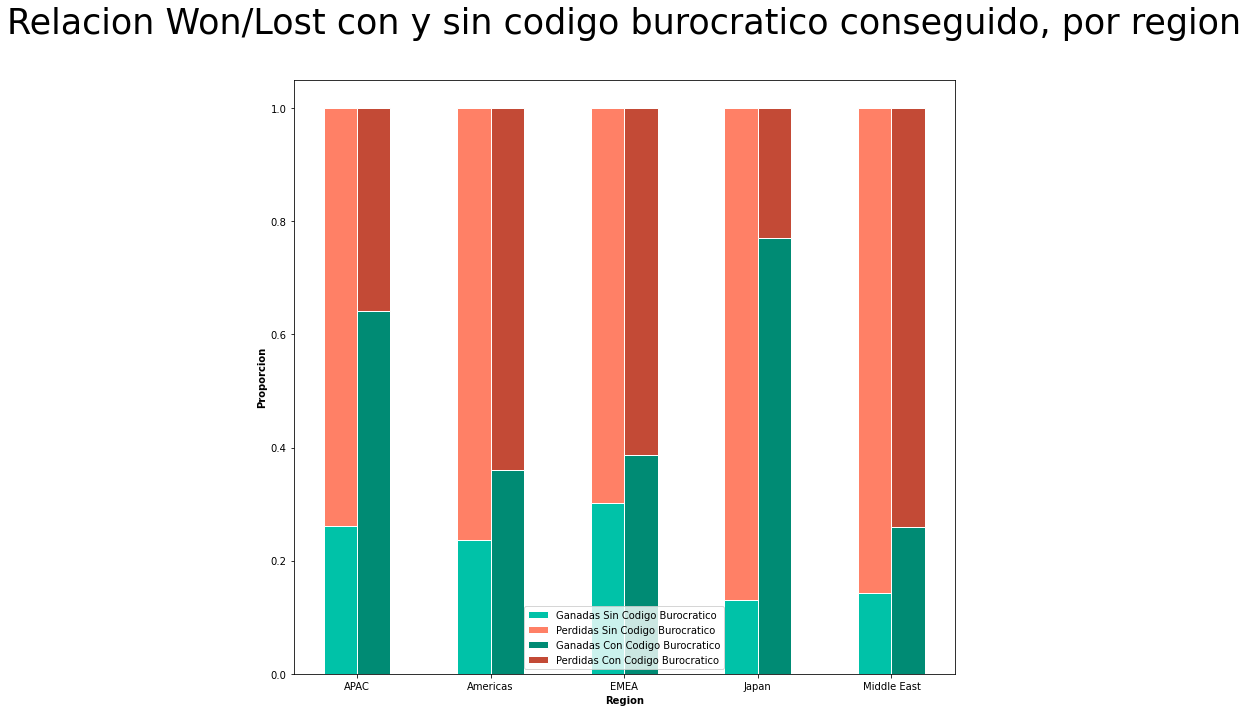

In [48]:
# Seteos grales del grafico
fig,ax=plt.subplots(figsize=(15,10))
barWidth = 0.25
 
# Seteo de lista de datos
barsWonSinCodigo_buroc = df_closed_won_sin_codigo_buroc
barsWonConCodigo_buroc = df_closed_won_con_codigo_buroc
barsLostSinCodigo_buroc = df_closed_lost_sin_codigo_buroc
barsLostConCodigo_buroc = df_closed_lost_con_codigo_buroc
 
# Seteo posiciones de barras
r1 = np.arange(len(barsWonSinCodigo_buroc))
r2 = [x + barWidth for x in r1]
 
# Genero Grafico
plt.bar(r1, barsWonSinCodigo_buroc, color='#00C2A8', width=barWidth, edgecolor='white', label='Ganadas Sin Codigo Burocratico')
plt.bar(r1, barsLostSinCodigo_buroc, bottom=barsWonSinCodigo_buroc, color='#FF8066', width=barWidth, edgecolor='white', label='Perdidas Sin Codigo Burocratico')
plt.bar(r2, barsWonConCodigo_buroc, color='#008B74', width=barWidth, edgecolor='white', label='Ganadas Con Codigo Burocratico')
plt.bar(r2, barsLostConCodigo_buroc, bottom=barsWonConCodigo_buroc, color='#C34A36', width=barWidth, edgecolor='white', label='Perdidas Con Codigo Burocratico')
 
# Seteo descripcion de ejes
plt.xlabel('Region', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(5)], df_x_region_x_codigo_buroc["Region"].unique())
plt.ylabel('Proporcion', fontweight='bold')
 
# Muestro grafico
plt.title('Relacion Won/Lost con y sin codigo burocratico conseguido, por region\n',size=35)
plt.legend()

#plt.tight_layout()
#plt.savefig("pngs/relacion-lost-won-por-region-segun-aprobacion-codigo-burocratico.png")

plt.show()

In [28]:
### Top 10 de tipos de oportunidad con mayor cantidad de ventas

In [29]:
df_won_x_op_type = df[df["Stage"] == "Closed Won"][["Opportunity_Type","Opportunity_ID"]].groupby(["Opportunity_Type", "Opportunity_ID"]).agg({"Opportunity_ID": 'count'})
df_won_x_op_type = df_won_x_op_type.rename(columns={"Opportunity_ID": "Opportunity_count"}).reset_index()
df_won_x_op_type = df_won_x_op_type.groupby(["Opportunity_Type"]).agg({"Opportunity_ID": 'count'}).reset_index()
df_won_x_op_type.columns = ["Opportunity_Type", "Ventas"]
df_won_x_op_type = df_won_x_op_type.nlargest(10,"Ventas")
df_won_x_op_type

,Opportunity_Type,Ventas
1,Opportunity_Type_1,2668
16,Opportunity_Type_7,1373
17,Opportunity_Type_8,516
9,Opportunity_Type_19,202
4,Opportunity_Type_12,122
13,Opportunity_Type_3,82
11,Opportunity_Type_20,30
14,Opportunity_Type_4,19
10,Opportunity_Type_2,17
2,Opportunity_Type_10,11


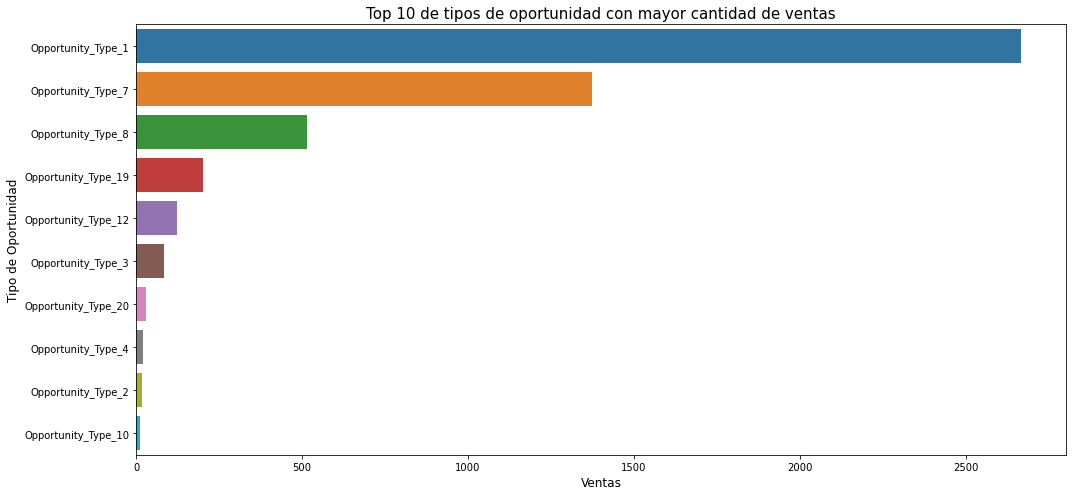

In [44]:
fig, ax = plt.subplots(figsize = (15, 7))
g = sns.barplot(x=df_won_x_op_type['Ventas'], y=df_won_x_op_type['Opportunity_Type'], orient='h',ax = ax,)
g.set_title("Top 10 de tipos de oportunidad con mayor cantidad de ventas", fontsize=15)
g.set_xlabel("Ventas", fontsize=12)
g.set_ylabel("Tipo de Oportunidad", fontsize=12)

#plt.tight_layout()
#plt.savefig("pngs/top-10-tipos-oportunidad-mayor-ventas.png")

In [31]:
#Convierto columna Last_Modified_Date a date
df["Account_Created_Date"] = pd.to_datetime(df["Account_Created_Date"], errors='coerce')

In [32]:
df_account_creation_date = df[["Account_Created_Date","Account_Name"]]
df_account_creation_date["Account_Created_Date"] = df_account_creation_date["Account_Created_Date"].dt.to_period('M')
df_account_creation_date = df_account_creation_date[["Account_Created_Date","Account_Name"]].groupby(["Account_Name"]).agg({"Account_Created_Date": "first"}).reset_index()
df_account_creation_date["Account_Qty"] = 1
df_account_creation_date = df_account_creation_date[["Account_Created_Date","Account_Qty"]]
df_account_creation_date = df_account_creation_date.groupby("Account_Created_Date").agg({"Account_Qty": "sum"})
#df_account_creation_date[df_account_creation_date["Account_Created_Date"] == "2016-01-20"].head(10)
df_account_creation_date = df_account_creation_date.sort_values("Account_Created_Date",ascending=True).reset_index()
#df_account_creation_date.head(10)

In [33]:
df_account_creation_date["Account_Created_Date"] = df_account_creation_date["Account_Created_Date"].map(str)
#df_account_creation_date.shape

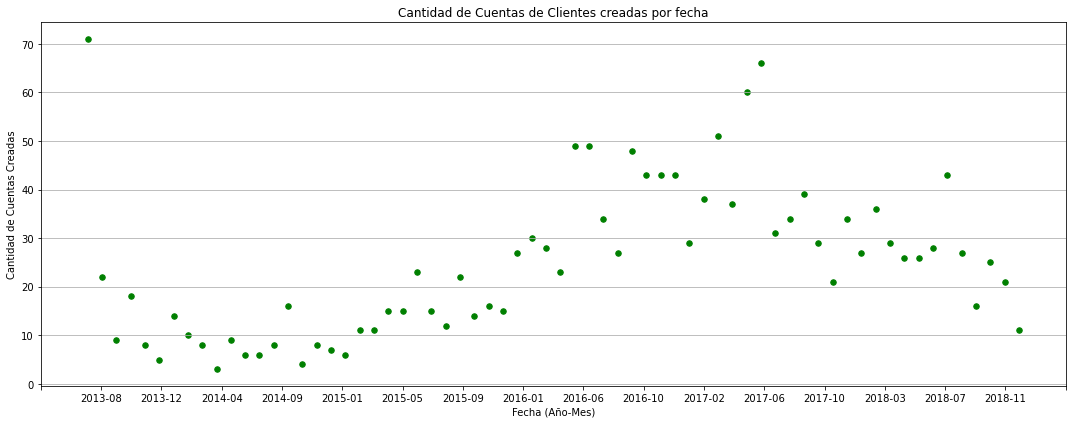

In [45]:
import matplotlib.ticker as ticker
ax = df_account_creation_date.plot(kind='scatter', x='Account_Created_Date', y='Account_Qty', color='Green', s=30, figsize=(15,6), linestyle='-', marker='o')
ax.xaxis.set_major_locator(ticker.LinearLocator(18))
ax.set_ylabel('Cantidad de Cuentas Creadas')
ax.set_xlabel('Fecha (Año-Mes)')
ax.set_title('Cantidad de Cuentas de Clientes creadas por fecha')
ax.grid('on', axis='y' )

#plt.tight_layout()
#plt.savefig("pngs/cuentas-cliente-creadas-por-fecha.png")

#c='Account_Qty', colormap='viridis'
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=10, offset=1))
#ax.xaxis.set_major_locator(ticker.AutoLocator())
#ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
#ax.xaxis.set_minor_locator(ticker.LinearLocator(19))